# BCAR Analysis - Jul 6, 2021

In [2]:
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [3]:
rm(list=ls())

ReqdLibs = c("repr","ggplot2","IRdisplay","psych","GGally","ggpubr","gghalves","patchwork",
             "huxtable","boot","broom","ggExtra","emmeans","dplyr","tidyr","boot","lme4","grid")
suppressMessages(invisible(lapply(ReqdLibs, library, character.only = TRUE)))

LI = read.csv("li_main.csv")
LI$task = factor(LI$task, levels=c('precision','power'))
LI$limb = factor(LI$limb, levels=c('affected','less-affected'))

# LI
thm = theme(axis.text=element_text(size=14,face="bold",colour = "black"),
      axis.title=element_text(size=14,face="bold",colour = "black"),
      title=element_text(size=14,face="bold"),
      legend.position="bottom",
      legend.text=element_text(size=14),
#       axis.line = element_line(colour = "black",size=0.75),
      axis.ticks.length = unit(0.25,"cm"),
      axis.ticks = element_line(colour = "black",size=0.75),
      plot.background = element_rect(fill = "transparent",colour = NA),
      strip.text = element_text(size = 14,face="bold"),
      plot.title = element_text(hjust = 0.5))

# Visually analyzing data (from previous iterations of BCAR manuscript)

## Figure 2
### Group mean change (post-pre) in Laterality Index by task (precision, power) for PMd and M1 using affected and less-affected limb for CIMT (solid line) and non-CIMT (dotted line) groups. If the voxel count number for Right and Left hemispheres were zero, LI was not calculated for that condition.  
A. CIMT precision (n=7), power (n=7); Non-CIMT precision (n=6) power (n=5). <br>
B. CIMT precision (n=6) power (n=8); Non-CIMT precision (n=5) power(n=5). <br>
C. CIMT precision (n=7) power (n=6) Non-CIMT precision (n=6) power (n=6). <br>
D. CIMT precision (n=7) power (n=8) Non-CIMT precision (n=6) power (n=6). <br>

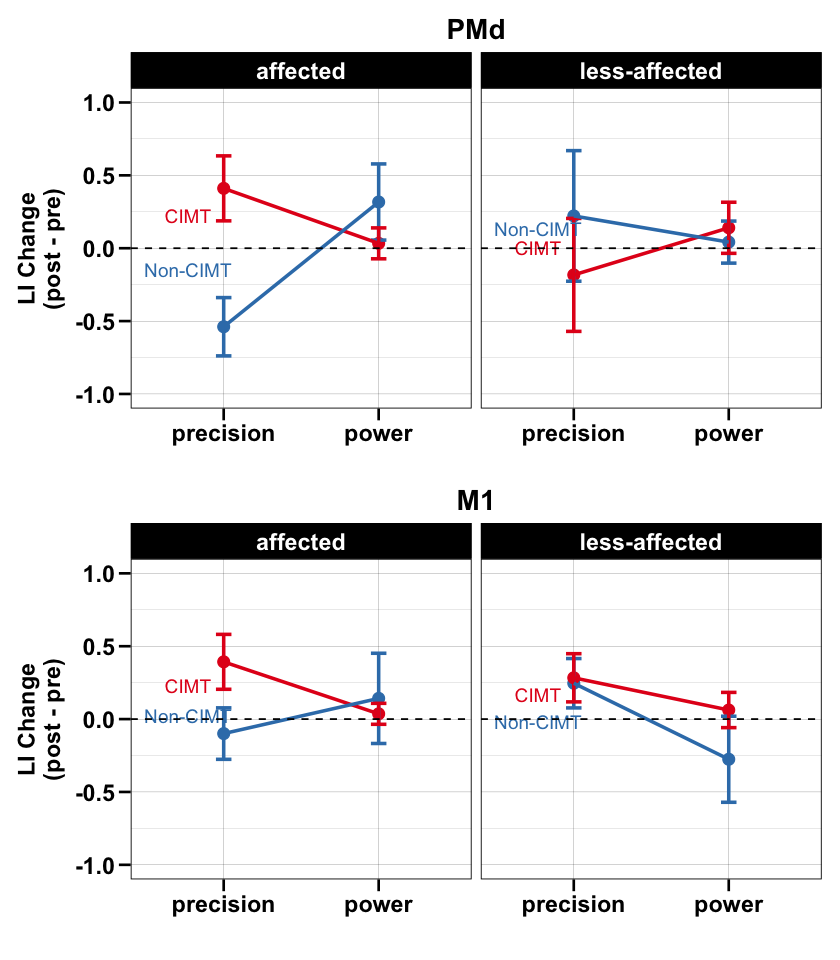

In [4]:
options(repr.plot.width=7, repr.plot.height=8)

A = ggplot(aes(y = PM_v_Li, x = task),data = LI)  + 
    stat_summary(aes(group = group,col=group),
                 fun.y=mean, geom= "point" , na.rm = TRUE,
                 position=position_dodge(0),size=3,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = group,col=group),
                 fun.data=mean_se, geom= "errorbar", na.rm = TRUE,
                 position = position_dodge(0),width = 0.2,size=1, show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = group,col=group),
                 fun.y=mean, geom= "line" , na.rm = TRUE,
                 position=position_dodge(0),size=1,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(label=group,0.77, col=group),
                 fun.y=mean, geom="text", 
                 na.rm = TRUE, size=4,show.legend = FALSE) + 
    facet_grid(~limb) +  scale_color_brewer(palette = "Set1",labels = c("CIMT","Non-CIMT")) + 
    geom_hline(yintercept = 0,linetype = "dashed") + ylab("LI Change\n(post - pre)") + xlab("") +
    coord_cartesian(ylim=c(-1,1))  + ggtitle("PMd") +
    theme_linedraw() + thm


B = ggplot(aes(y = M1_v_Li, x = task),data = LI)  + 
    stat_summary(aes(group = group,col=group),
                 fun.y=mean, geom= "point" ,  na.rm = TRUE,
                 position=position_dodge(0),size=3,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = group,col=group),
                 fun.data=mean_se, geom= "errorbar", na.rm = TRUE,
                 position = position_dodge(0),width = 0.2,size=1, show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = group,col=group),
                 fun.y=mean, geom= "line" , na.rm = TRUE,
                 position=position_dodge(0),size=1,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(label=group,0.77, col=group),
                 fun.y=mean, geom="text", 
                 na.rm = TRUE, size=4,show.legend = FALSE) + 
    facet_grid(~limb) +  scale_color_brewer(palette = "Set1") + 
    geom_hline(yintercept = 0, linetype = "dashed") + ylab("LI Change\n(post - pre)") + xlab("") +
    coord_cartesian(ylim=c(-1,1))  + ggtitle("M1") +
    theme_linedraw() + thm

A / B


In [5]:
LI_raw = read.csv("li_raw.csv")
# LI_raw
LI_raw  %>% 
pivot_longer(cols = c("pre","post"),"test",values_to = "LI")  %>% 
filter(task=="precision") %>% 
filter(limb=="affected") %>% 
{.->> LI_raw2}

LI_raw2$group = factor(LI_raw2$group, levels=c('treated','control'))
LI_raw2$test = factor(LI_raw2$test, levels=c('pre','post'))

group.labs <- c("CIMT","Non-CIMT")
names(group.labs) <- c("treated","control")


head(LI_raw) 

levels(LI_raw2$group) <-c("CIMT","Non-CIMT")

head(LI_raw2)

ID,task,limb,area,pre,post,group,diff,sex,uefm,chron,age,lesion_vol
16340,power,less-affected,M1_v_Li,1.0000000,0.79411765,control,-0.2058824,male,52,6.1,51,0.7
16340,power,less-affected,PM_v_Li,-0.6000000,-0.71428571,control,-0.1142857,male,52,6.1,51,0.7
16340,power,affected,M1_v_Li,0.0000000,-0.42028985,control,-0.4202899,male,52,6.1,51,0.7
16340,power,affected,PM_v_Li,0.3592233,0.01408451,control,-0.3451388,male,52,6.1,51,0.7
16340,precision,less-affected,M1_v_Li,0.3793103,1.00000000,control,0.6206897,male,52,6.1,51,0.7
16340,precision,less-affected,PM_v_Li,-0.4468085,1.00000000,control,1.4468085,male,52,6.1,51,0.7


ID,task,limb,area,group,diff,sex,uefm,chron,age,lesion_vol,test,LI
16340,precision,affected,M1_v_Li,Non-CIMT,0.2624113,male,52,6.1,51,0.7,pre,-0.66666667
16340,precision,affected,M1_v_Li,Non-CIMT,0.2624113,male,52,6.1,51,0.7,post,-0.40425532
16340,precision,affected,PM_v_Li,Non-CIMT,-0.3323810,male,52,6.1,51,0.7,pre,-0.04761905
16340,precision,affected,PM_v_Li,Non-CIMT,-0.3323810,male,52,6.1,51,0.7,post,-0.38000000
16345,precision,affected,M1_v_Li,Non-CIMT,0.2040816,female,63,11.8,26,3.1,pre,0.79591837
16345,precision,affected,M1_v_Li,Non-CIMT,0.2040816,female,63,11.8,26,3.1,post,1.00000000


## Figure 3
### Pre and post laterality index of PMd during precision grip for affected hand for (A) CIMT group and (B) Non-CIMT group. Data missing for participant 03. Bold lines represent group means and solid lines depict individual subjects.

In [6]:
new_cols = c('#0571b0','#ca0020')
options(repr.plot.width=4, repr.plot.height=4)
my_comparisonx = list(c("pre","post"))
A = ggplot(aes(y = LI, x = test),data = subset(LI_raw2,area=="PM_v_Li"))  + 
    stat_summary(aes(group = ID, col = group),
                 fun.y=mean, geom = "point", na.rm = TRUE,
                 position=position_dodge(0),size=2,show.legend = FALSE,alpha=0.5) + 
    stat_summary(aes(group = ID, col = group),
                 fun.y=mean, geom = "line", na.rm = TRUE,
                 position=position_dodge(0),size=0.25,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = group,col = group),
                 fun.y=mean, geom= "line", na.rm = TRUE,
                 position=position_dodge(0),size=1.5,show.legend = TRUE,alpha=1) + 
    stat_summary(aes(group = group,col = group),
                 fun.y=mean, geom= "point", na.rm = TRUE,
                 position=position_dodge(0),size=3,show.legend = FALSE,alpha=1) + 
    scale_color_manual(values = new_cols) + 

#     stat_compare_means(comparisons = my_comparisonx,size=6,face="bold", na.rm = TRUE,
#                        label.y = 1.2) +

#     facet_grid(~group,labeller = labeller(group = group.labs)) + 
    geom_hline(yintercept = 0,linetype = "dashed") + ylab("LI") + xlab("") +
    coord_cartesian(ylim=c(-1.5,1.5))  + ggtitle("PMd during precision grasp") + 
    theme_minimal() +  thm

B = ggplot(aes(y = LI, x = test),data = subset(LI_raw2,area=="M1_v_Li"))  + 
    stat_summary(aes(group = ID, col = group),
                 fun.y=mean, geom = "point", na.rm = TRUE,
                 position=position_dodge(0),size=2,show.legend = FALSE,alpha=0.5) + 
    stat_summary(aes(group = ID, col = group),
                 fun.y=mean, geom = "line", na.rm = TRUE,
                 position=position_dodge(0),size=0.25,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = group,col = group),
                 fun.y=mean, geom= "line", na.rm = TRUE,
                 position=position_dodge(0),size=1.5,show.legend = TRUE,alpha=1) + 
    stat_summary(aes(group = group,col = group),
                 fun.y=mean, geom= "point", na.rm = TRUE,
                 position=position_dodge(0),size=3,show.legend = FALSE,alpha=1) + 
    scale_color_manual(values = new_cols) + 

#     stat_compare_means(comparisons = my_comparisonx,size=6,face="bold", na.rm = TRUE,
#                        label.y = 1.2) +

#     facet_grid(~group,labeller = labeller(group = group.labs)) + 
    geom_hline(yintercept = 0,linetype = "dashed") + ylab("LI") + xlab("") +
    coord_cartesian(ylim=c(-1.5,1.5))  + ggtitle("M1 during precision grasp") + 
    theme_minimal() +  thm

In [7]:
LI  %>% 
filter(task=="precision") %>% 
filter(limb=="affected")  %>% 
{.->>LI3}
head(LI3)

ID,group,task,limb,M1_v_Li,PM_v_Li,wmft15_pre,wmft15_post,wmft15_change,wmft6_pre,⋯,mal_aou_post,mal_aou_change,mal_qom_pre,mal_qom_post,mal_qom_change,uefm,chron,sex,age,lesion_vol
16340,Non-CIMT,precision,affected,0.2624113,-0.332380952,3.700,2.450,-1.250,6.180,⋯,2.18,1.22,0.84,1.41,0.57,52,6.1,male,51,0.7
16345,Non-CIMT,precision,affected,0.2040816,0.000000000,3.710,2.940,-0.770,7.540,⋯,2.90,1.19,3.23,4.09,0.86,63,11.8,female,26,3.1
16353,Non-CIMT,precision,affected,-0.8451178,-0.874024526,10.220,4.650,-5.570,4.550,⋯,2.24,0.02,2.95,3.19,0.24,49,8.6,female,69,2.3
16355,Non-CIMT,precision,affected,0.2296296,-0.952380952,5.340,1.450,-3.890,2.050,⋯,3.10,1.69,1.36,1.62,0.26,37,8.4,female,76,1.4
16364,Non-CIMT,precision,affected,-0.3174603,-1.076923077,46.735,50.895,4.160,101.975,⋯,2.86,1.82,0.67,2.03,1.36,44,10.8,female,51,27.7
16368,Non-CIMT,precision,affected,-0.1304974,0.002914172,24.541,7.730,-16.811,36.010,⋯,0.79,0.05,1.17,1.21,0.04,51,11.4,male,68,0.8


## Figure 4
### Scatter plot for laterality index change for PMd and WMFT-6 change for affected hand during precision grasp for CIMT group (filled in triangles) and non-CIMT group (open triangles). Larger triangles represent group means and small triangles depict individual subjects. Data missing for participant 03. 


	Spearman's rank correlation rho

data:  LI3$PM_v_Li and LI3$wmft6_change
S = 524, p-value = 0.135
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4395604 


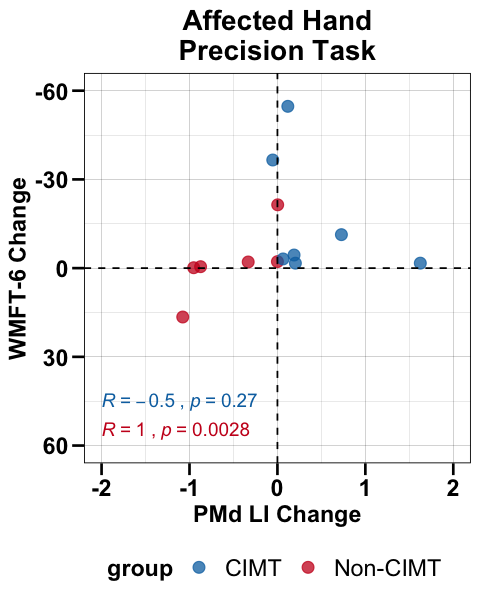

In [8]:
options(repr.plot.width=4, repr.plot.height=5)

ggplot(LI3, aes(x = PM_v_Li, y = wmft6_change,col=group)) +
    geom_point(size=3,show.legend = TRUE,alpha = 0.75) +
    stat_cor(method = "spearman", size = 4, label.x = -2,label.y = c(-45,-55),show.legend = FALSE)+
    coord_cartesian(xlim=c(-2,2),ylim=c(-60,60)) + 
    geom_hline(yintercept = 0,linetype = "dashed") + geom_vline(xintercept = 0,linetype = "dashed") +
    scale_y_reverse() + scale_color_manual(values = new_cols) +
    ylab("WMFT-6 Change") + xlab("PMd LI Change") + ggtitle("Affected Hand\nPrecision Task") + 
    theme_linedraw() + thm 

cor.test(LI3$PM_v_Li,LI3$wmft6_change,na.rm = TRUE,method = 'spearman')

# hist(LI3$wmft6_change)


## Extra Figures
### grouped by limb rather than treatment group

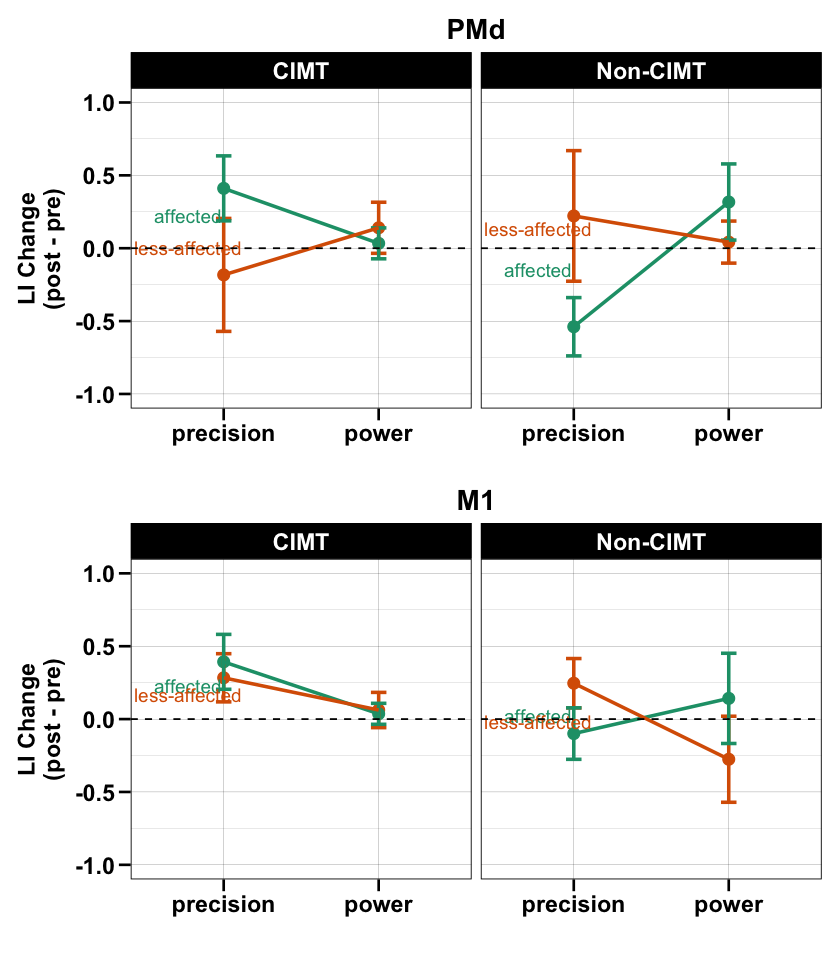

In [9]:
options(repr.plot.width=7, repr.plot.height=8)

C = ggplot(aes(y = PM_v_Li, x = task),data = LI)  + 
    stat_summary(aes(group = limb,col=limb),
                 fun.y=mean, geom= "point" , na.rm = TRUE,
                 position=position_dodge(0),size=3,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = limb,col=limb),
                 fun.data=mean_se, geom= "errorbar", na.rm = TRUE,
                 position = position_dodge(0),width = 0.2,size=1, show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = limb,col=limb),
                 fun.y=mean, geom= "line" , na.rm = TRUE,
                 position=position_dodge(0),size=1,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(label=limb,0.77, col=limb),
                 fun.y=mean, geom="text", 
                 na.rm = TRUE, size=4,show.legend = FALSE) + 
    facet_grid(~group) +  scale_color_brewer(palette = "Dark2",labels = c("CIMT","Non-CIMT")) + 
    geom_hline(yintercept = 0,linetype = "dashed") + ylab("LI Change\n(post - pre)") + xlab("") +
    coord_cartesian(ylim=c(-1,1))  + ggtitle("PMd") +
    theme_linedraw() + thm


D = ggplot(aes(y = M1_v_Li, x = task),data = LI)  + 
    stat_summary(aes(group = limb,col=limb),
                 fun.y=mean, geom= "point" ,  na.rm = TRUE,
                 position=position_dodge(0),size=3,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = limb,col=limb),
                 fun.data=mean_se, geom= "errorbar", na.rm = TRUE,
                 position = position_dodge(0),width = 0.2,size=1, show.legend = FALSE,alpha=1) + 
    stat_summary(aes(group = limb,col=limb),
                 fun.y=mean, geom= "line" , na.rm = TRUE,
                 position=position_dodge(0),size=1,show.legend = FALSE,alpha=1) + 
    stat_summary(aes(label=limb,0.77, col=limb),
                 fun.y=mean, geom="text", 
                 na.rm = TRUE, size=4,show.legend = FALSE) + 
    facet_grid(~group) +  scale_color_brewer(palette = "Dark2") + 
    geom_hline(yintercept = 0, linetype = "dashed") + ylab("LI Change\n(post - pre)") + xlab("") +
    coord_cartesian(ylim=c(-1,1))  + ggtitle("M1") +
    theme_linedraw() + thm

C / D


## Revision 1 -- Direct comparison of CIMT and Non-CIMT groups during different tasks with the *affected* limb

In [10]:
LI  %>% 
filter(limb=="affected")  %>% 
# rename('M1' = 'M1_v_Li','PMD' = 'PM_v_Li') %>% 
# pivot_longer(cols = c('M1','PMD'),"region",values_to = "LI_change") %>% 
drop_na() %>% 

{.->>LI4}

head(LI4)
LI4$group = factor(LI4$group, levels=c('CIMT','Non-CIMT'))


t.test(LI4$PM_v_Li[LI4$group=="Non-CIMT" & LI4$task=="power"],
       LI4$PM_v_Li[LI4$group=="Non-CIMT" & LI4$task=="precision"])

ID,group,task,limb,M1_v_Li,PM_v_Li,wmft15_pre,wmft15_post,wmft15_change,wmft6_pre,⋯,mal_aou_post,mal_aou_change,mal_qom_pre,mal_qom_post,mal_qom_change,uefm,chron,sex,age,lesion_vol
16340,Non-CIMT,power,affected,-0.42028985,-0.3451388,3.70,2.45,-1.25,6.18,⋯,2.18,1.22,0.84,1.41,0.57,52,6.1,male,51,0.7
16340,Non-CIMT,precision,affected,0.26241135,-0.3323810,3.70,2.45,-1.25,6.18,⋯,2.18,1.22,0.84,1.41,0.57,52,6.1,male,51,0.7
16345,Non-CIMT,precision,affected,0.20408163,0.0000000,3.71,2.94,-0.77,7.54,⋯,2.90,1.19,3.23,4.09,0.86,63,11.8,female,26,3.1
16353,Non-CIMT,power,affected,-0.17857143,0.6428571,10.22,4.65,-5.57,4.55,⋯,2.24,0.02,2.95,3.19,0.24,49,8.6,female,69,2.3
16353,Non-CIMT,precision,affected,-0.84511784,-0.8740245,10.22,4.65,-5.57,4.55,⋯,2.24,0.02,2.95,3.19,0.24,49,8.6,female,69,2.3
16355,Non-CIMT,power,affected,-0.05884791,1.0000000,5.34,1.45,-3.89,2.05,⋯,3.10,1.69,1.36,1.62,0.26,37,8.4,female,76,1.4



	Welch Two Sample t-test

data:  LI4$PM_v_Li[LI4$group == "Non-CIMT" & LI4$task == "power"] and LI4$PM_v_Li[LI4$group == "Non-CIMT" & LI4$task == "precision"]
t = 2.6016, df = 7.8919, p-value = 0.0319
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09542961 1.61639931
sample estimates:
 mean of x  mean of y 
 0.3171152 -0.5387992 


ID,group,task,limb,M1_v_Li,PM_v_Li,wmft15_pre,wmft15_post,wmft15_change,wmft6_pre,⋯,mal_aou_post,mal_aou_change,mal_qom_pre,mal_qom_post,mal_qom_change,uefm,chron,sex,age,lesion_vol
16340,Non-CIMT,power,affected,-0.42028985,-0.34513879,3.700,2.450,-1.250,6.180,⋯,2.18,1.22,0.84,1.41,0.57,52,6.1,male,51,0.7
16353,Non-CIMT,power,affected,-0.17857143,0.64285714,10.220,4.650,-5.570,4.550,⋯,2.24,0.02,2.95,3.19,0.24,49,8.6,female,69,2.3
16355,Non-CIMT,power,affected,-0.05884791,1.00000000,5.340,1.450,-3.890,2.050,⋯,3.10,1.69,1.36,1.62,0.26,37,8.4,female,76,1.4
16364,Non-CIMT,power,affected,1.66153846,0.52747253,46.735,50.895,4.160,101.975,⋯,2.86,1.82,0.67,2.03,1.36,44,10.8,female,51,27.7
16368,Non-CIMT,power,affected,-0.15129252,-0.23961469,24.541,7.730,-16.811,36.010,⋯,0.79,0.05,1.17,1.21,0.04,51,11.4,male,68,0.8
16350,CIMT,power,affected,0.03234382,-0.05344013,33.052,8.850,-24.202,71.802,⋯,3.68,2.30,2.29,3.28,0.99,45,5.2,female,58,0.7
16352,CIMT,power,affected,-0.01363884,0.20000000,30.693,22.542,-8.151,70.433,⋯,1.25,0.58,2.33,2.18,-0.15,51,6.1,male,38,14.5
16357,CIMT,power,affected,-0.03097345,0.15984991,23.221,7.180,-16.041,49.661,⋯,4.38,1.38,3.31,4.12,0.81,50,8.1,male,57,72.6
16369,CIMT,power,affected,-0.16720458,-0.23859127,7.280,4.910,-2.370,11.100,⋯,4.37,0.20,3.10,3.85,0.75,51,5.7,male,80,1.2
16370,CIMT,power,affected,0.03336951,-0.01040708,3.830,2.550,-1.280,6.030,⋯,4.05,0.47,3.44,3.91,0.47,53,7.0,male,73,0.8


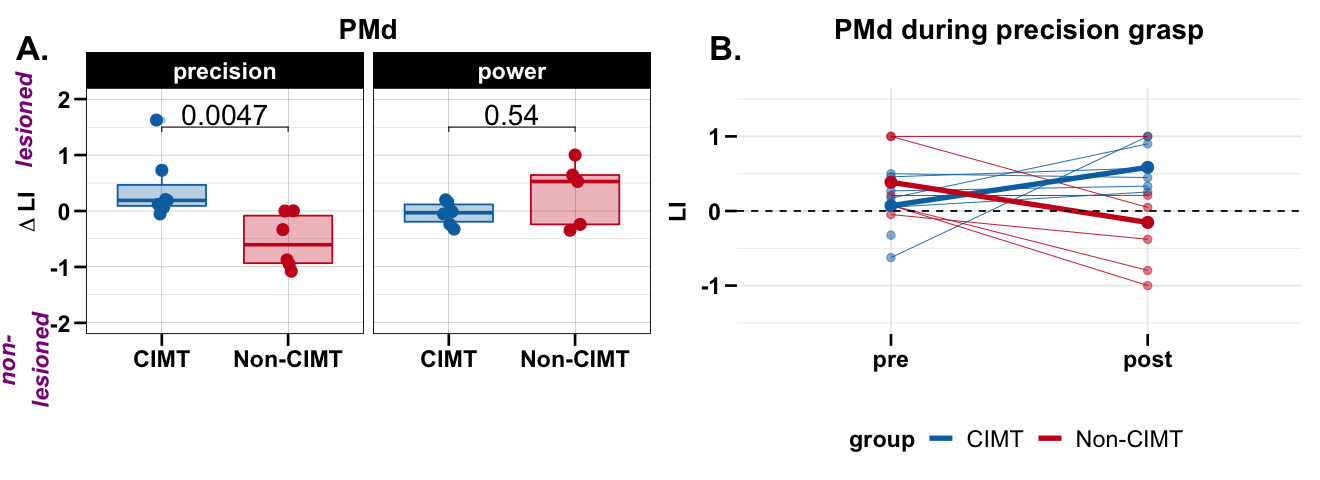

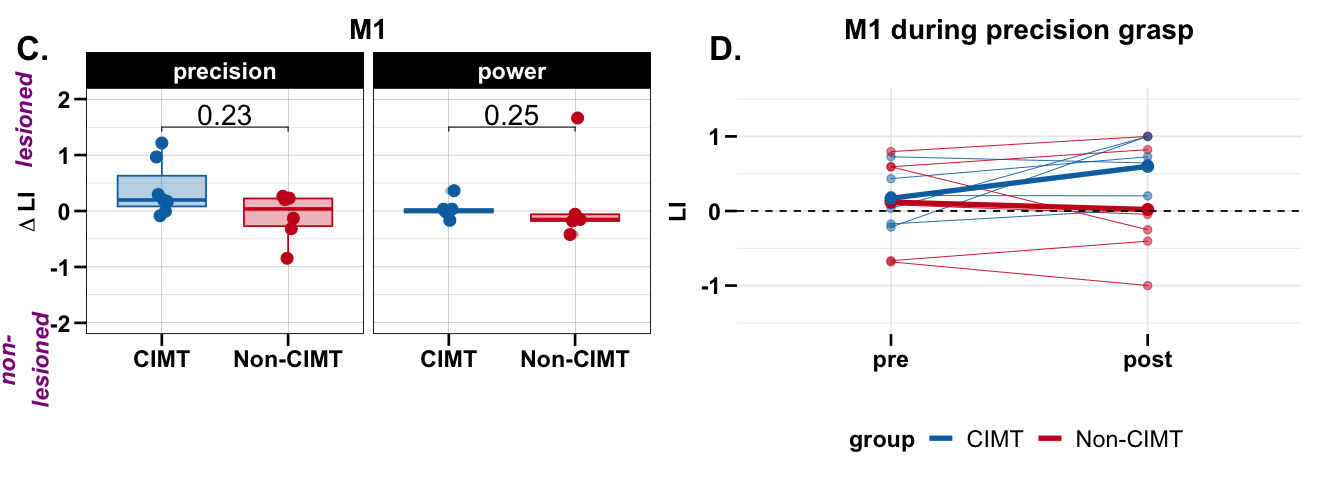

In [11]:
LI4 %>% 
filter(task=="power")
options(repr.plot.width=11, repr.plot.height=4)
my_comparison <- list(c("CIMT","Non-CIMT"))


F = ggplot(aes(y = PM_v_Li, x = group),data = LI4)  + 

    geom_point(aes(col=group,fill=group),na.rm = TRUE,
               alpha = 1, position = position_dodge2(0.1), show.legend = FALSE,size=3) +
    geom_boxplot(aes(x=group,col=group,fill=group),na.rm = TRUE,
                 alpha=0.3, width = 0.7, position=position_dodge(0.6), show.legend = FALSE,size=0.5) + 
    stat_compare_means(comparisons = my_comparison,size=6,face="bold", na.rm = TRUE,
                       label.y = 1.5,label.x = 0.5) +
    facet_grid(~task) + coord_cartesian(ylim=c(-2,2)) + 
    scale_fill_manual(values = new_cols) + scale_color_manual(values = new_cols) +
    ylab(expression(bold(Delta~ LI))) + xlab("") + ggtitle("PMd") + 
    theme_linedraw() +thm
    


G = ggplot(aes(y = M1_v_Li, x = group),data = LI4)  + 

    geom_point(aes(col=group,fill=group),na.rm = TRUE,
               alpha = 1, position = position_dodge2(0.1), show.legend = FALSE,size=3) +
    geom_boxplot(aes(x=group,col=group,fill=group),na.rm = TRUE,
                 alpha=0.3, width = 0.7, position=position_dodge(0.6), show.legend = FALSE,size=0.5) + 
    stat_compare_means(comparisons = my_comparison,size=6,face="bold", na.rm = TRUE,
                       label.y = 1.5,label.x = 0.5) +
    facet_grid(~task) + coord_cartesian(ylim=c(-2,2)) + 
    scale_fill_manual(values = new_cols) + scale_color_manual(values = new_cols) +
    ylab(expression(bold(Delta~ LI))) + xlab("") + ggtitle("M1") + 
    theme_linedraw() + thm


(F | A)
grid.text("non-\nlesioned", x = unit(c(0.018), "npc"), y = unit(c(0.25), "npc"),
       rot = 90,  gp = gpar(fontsize = 14, fontface = 4,col = "darkmagenta"))
grid.text("lesioned", x = unit(c(0.018), "npc"), y = unit(c(0.75), "npc"),
       rot = 90,  gp = gpar(fontsize = 14, fontface = 4,col = "darkmagenta"))
grid.text("A.", x = unit(c(0.025), "npc"), y = unit(c(0.9), "npc"),
       rot = 0,  gp = gpar(fontsize = 20, fontface = 2, col = "black"))
grid.text("B.", x = unit(c(0.55), "npc"), y = unit(c(0.9), "npc"),
       rot = 0,  gp = gpar(fontsize = 20, fontface = 2, col = "black"))

(G | B)
grid.text("non-\nlesioned", x = unit(c(0.018), "npc"), y = unit(c(0.25), "npc"),
       rot = 90,  gp = gpar(fontsize = 14, fontface = 4,col = "darkmagenta"))
grid.text("lesioned", x = unit(c(0.018), "npc"), y = unit(c(0.75), "npc"),
       rot = 90,  gp = gpar(fontsize = 14, fontface = 4,col = "darkmagenta"))
grid.text("C.", x = unit(c(0.025), "npc"), y = unit(c(0.9), "npc"),
       rot = 0,  gp = gpar(fontsize = 20, fontface = 2, col = "black"))
grid.text("D.", x = unit(c(0.55), "npc"), y = unit(c(0.9), "npc"),
       rot = 0,  gp = gpar(fontsize = 20, fontface = 2, col = "black"))

## A multiple regression model to show the above effects

* PMd Lat Index ~ treatment + task + treatment x task  + ID <br><br>

* Compared to the control group, the CIMT group shows greater activation of the ipsilesional PMd during the precision, but not the power task, with the affected limb.<br>
* Check out this article by Kantak for a possible explanation:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4886541/

# Test for normality of continuous variables to be added as confounders (age, uefm, chron)



	Shapiro-Wilk normality test

data:  LI4$age
W = 0.93795, p-value = 0.1468


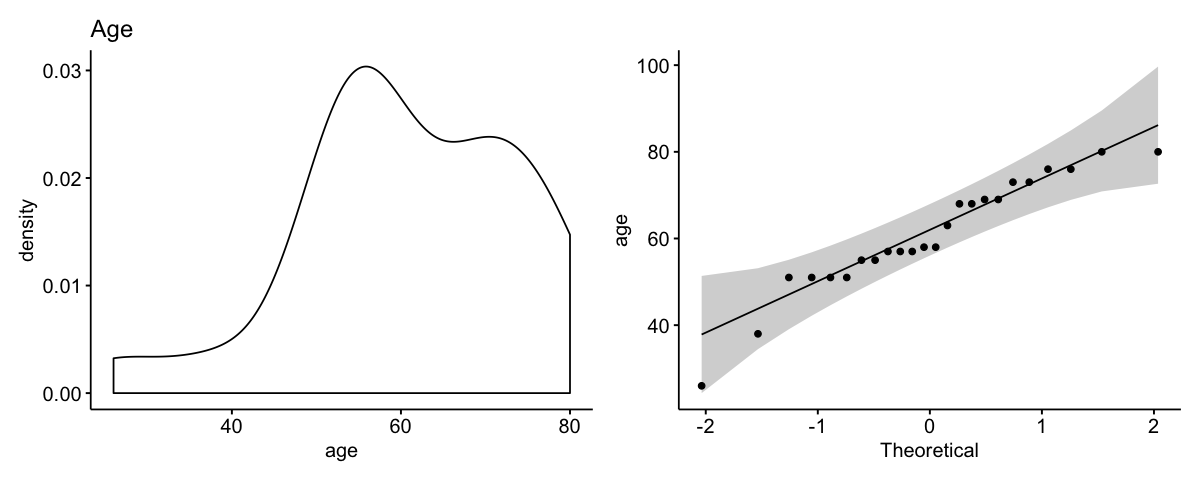


	Shapiro-Wilk normality test

data:  LI4$uefm
W = 0.91882, p-value = 0.055


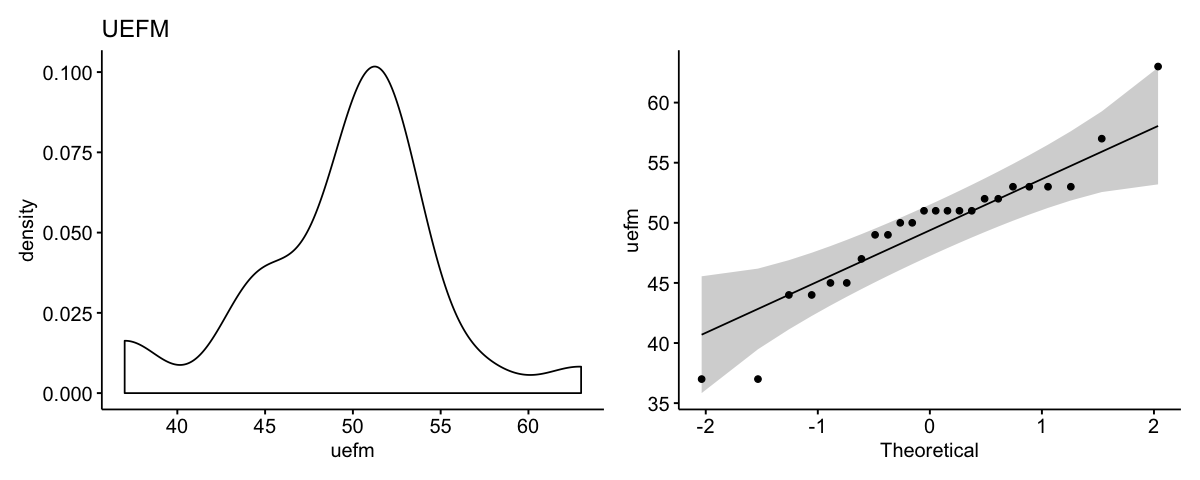


	Shapiro-Wilk normality test

data:  LI4$chron
W = 0.92124, p-value = 0.06221


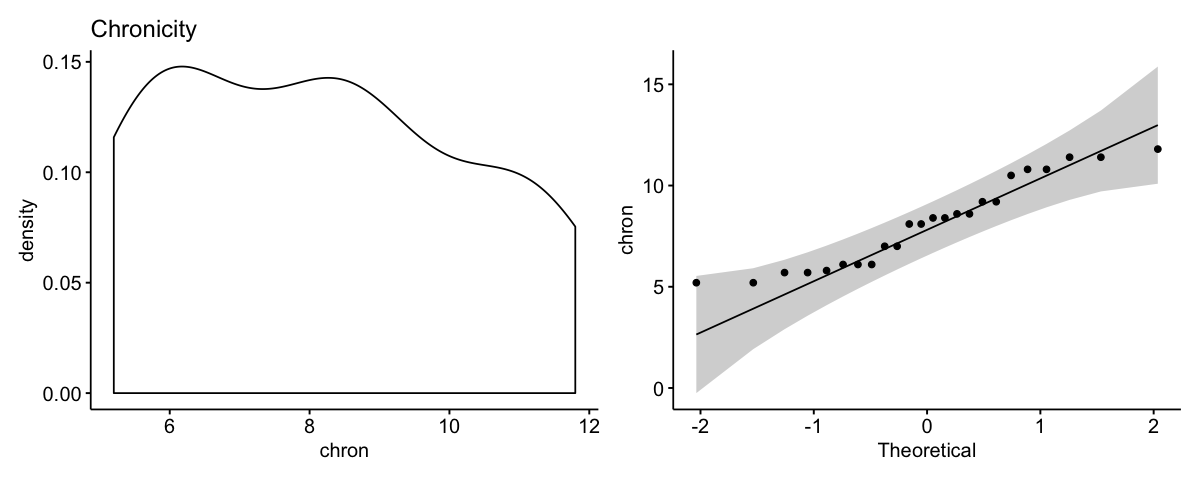


	Shapiro-Wilk normality test

data:  log(LI4$lesion_vol)
W = 0.83114, p-value = 0.0009958


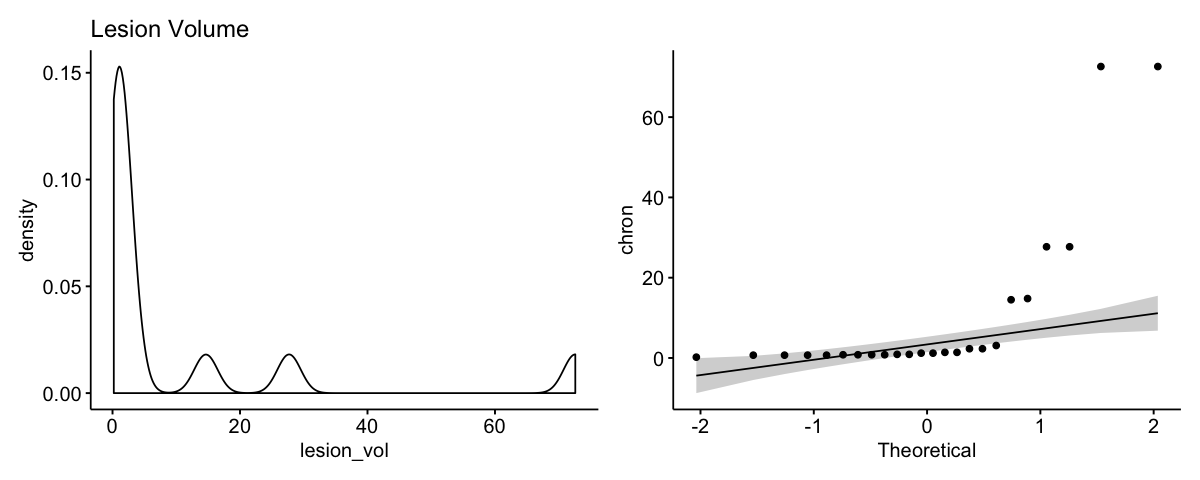

In [12]:
options(repr.plot.width=10, repr.plot.height=4)
ggdensity(LI4$age,main="Age",xlab = "age") | ggqqplot(LI4$age,ylab = "age")
shapiro.test(LI4$age)

ggdensity(LI4$uefm,main="UEFM",xlab = "uefm") | ggqqplot(LI4$uefm,ylab = "uefm")
shapiro.test(LI4$uefm)

ggdensity(LI4$chron,main="Chronicity",xlab = "chron") | ggqqplot(LI4$chron,ylab = "chron")
shapiro.test(LI4$chron)

ggdensity(LI4$lesion_vol,main="Lesion Volume",xlab = "lesion_vol") | ggqqplot(LI4$lesion_vol,ylab = "chron")
shapiro.test(log(LI4$lesion_vol))


In [14]:
# LI4
# contrasts(LI4$group) = c(1,0)
contrasts(LI4$group)
# contrasts(LI4$task) = c(1,0)
contrasts(LI4$task) 

lm.PM = lm(PM_v_Li ~ group * task, data = LI4,na.action = na.exclude)

lm.M1 = lm(M1_v_Li ~ group * task, data = LI4,na.action = na.exclude)


# table2 = tab_model(lm.PM,lm.M1, auto.label = FALSE,
#           pred.labels = c("(Intercept)","Group","Task","Group x Task"),
# #           pred.labels = c("(Intercept)","CIMT","Precision grasp","Precision grasp in CIMT"),
#          dv.labels = c("PMd ΔLI","M1 ΔLI"))

# display_html(head(table2$page.complete))
  
# plot(lm.PM)

anova(lm.PM)
glance(lm.PM)

anova(lm.M1)
glance(lm.M1)

,Non-CIMT
CIMT,0
Non-CIMT,1


,power
precision,0
power,1


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,1,0.7316629,0.7316629,3.0044550,0.098427188
task,1,0.1253214,0.1253214,0.5146121,0.481444382
group:task,1,2.5416924,2.5416924,10.4370467,0.004192255
Residuals,20,4.8705203,0.2435260,NA,NA


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.4110044,0.3226551,0.4934836,4.652038,0.01265584,4,-14.91629,39.83258,45.72285,4.87052,20


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,1,0.25041995,0.25041995,0.9220036,0.3484151
task,1,0.02905824,0.02905824,0.1069875,0.7469990
group:task,1,0.58085152,0.58085152,2.1385964,0.1591704
Residuals,20,5.43208167,0.27160408,NA,NA


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.136725,0.007233707,0.5211565,1.055863,0.3898468,4,-16.22575,42.4515,48.34177,5.432082,20


term,statistic,bias,std.error,conf.low,conf.high
(Intercept),0.4107064,0.0034513079,0.2192836,0.06647357,0.8890146
groupNon-CIMT,-0.9495056,-0.0052651709,0.2954914,-1.58493399,-0.4109705
taskpower,-0.4550654,-0.0054658593,0.2462994,-0.95610100,-0.0361791
groupNon-CIMT:taskpower,1.3109799,-0.0007277333,0.4027270,0.54157141,2.1150349


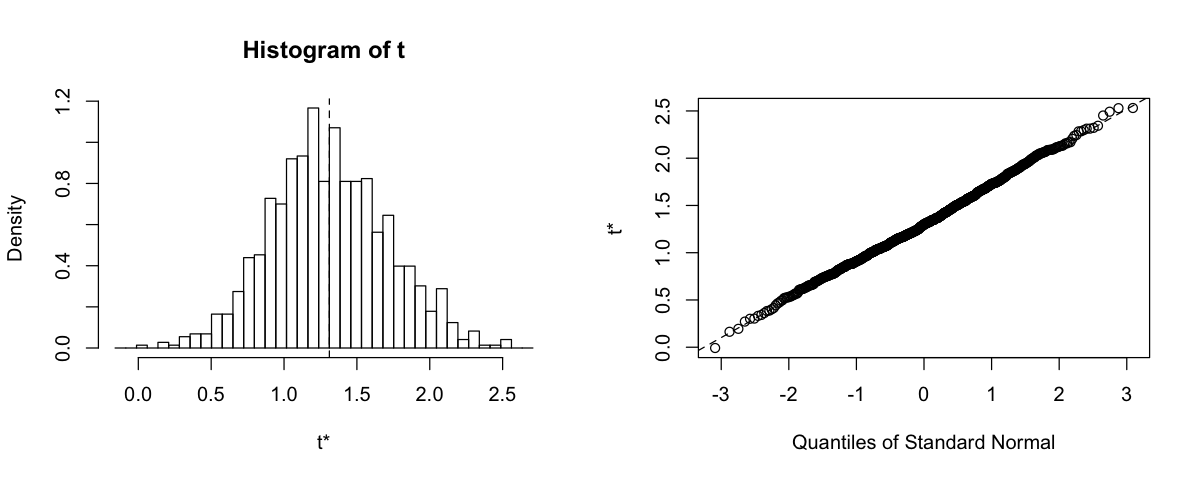

In [15]:
bootFn.Mod2=function(data,index)
    return(coef(lm(PM_v_Li ~ group * task, data = LI4[index,],na.action = na.exclude)))

set.seed(1)
index = sample(24,24,replace=T)
# index

b.Mod2 = boot(LI4,bootFn.Mod2,1000)
tidy(b.Mod2,conf.int = TRUE)
options(repr.plot.width=10, repr.plot.height=4)
plot(b.Mod2,index=4)


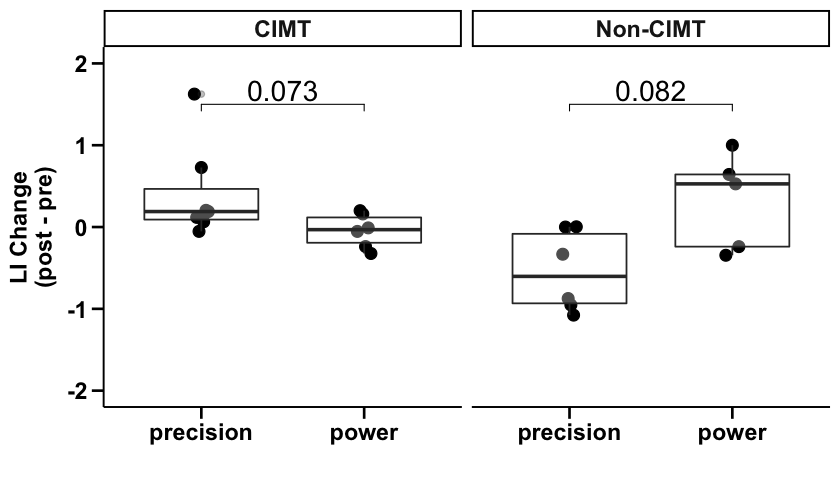

In [16]:
options(repr.plot.width=7, repr.plot.height=4)
my_comparison2 <- list(c("precision","power"))
G = ggplot(aes(y = PM_v_Li, x = task),data = LI4)  + 

    geom_point(na.rm = TRUE,
               alpha = 1, position = position_dodge2(0.1), show.legend = FALSE,size=3) +
    geom_boxplot(na.rm = TRUE,
                 alpha=0.3, width = 0.7, position=position_dodge(0.6), show.legend = FALSE,size=0.5) + 
    stat_compare_means(comparisons = my_comparison2,size=6,face="bold", na.rm = TRUE,
                       label.y = 1.5,label.x = 0.5) +
    coord_cartesian(ylim=c(-2,2)) + 
    scale_fill_manual(values = new_cols) + scale_color_manual(values = new_cols) +
    ylab("LI Change\n(post - pre)") + xlab("") + facet_grid(~group) + 
    theme_classic2() + thm

G